# Actividad 18: Aprendizaje No Supervisado – Agrupamiento de Datos

## Tarea

1.	Ejercicio
Eres un analista de datos en una empresa de marketing y se te ha proporcionado un archivo CSV llamado “datos_clientes.csv” que contiene información sobre diferentes clientes. El archivo tiene problemas de valores faltantes, datos duplicados y valores atípicos, que deben ser limpiados antes de realizar cualquier análisis.

2.	Instrucciones:

    - a)	Cargar los datos desde el archivo CSV y almacenarlos en un DataFrame llamado clientes.
    - b)	Obtén los elementos de estadística descriptiva de los datos cargados.
    - c)	Verifica que datos de clientes siguen las siguientes características:
        - i.	Nombre: cadena de texto aleatoria.
        - ii.	Edad: entero aleatorio entre 18 y 65.
        - iii.	Ingresos: número decimal aleatorio entre 1000 y 50000.
        - iv.	Gasto: número decimal aleatorio entre 10 y 500.
        - v.	Puntuación: entero aleatorio entre 1 y 100.
    - d)	Utilizar la biblioteca scikit-learn para realizar el agrupamiento utilizando HCA y KMeans.
        - i.	Aplicar la técnica de HCA para agrupar los clientes en 3 clusters.
        - ii.	Aplicar el algoritmo KMeans para agrupar los clientes en 5 clusters.
        - iii.	Realizar visualizaciones de los resultados obtenidos para cada algoritmo utilizando los gráficos correspondientes (scatterplots, dendrogramas, etc) que muestren los grupos/clusters.
    - e)	Obtener el número óptimo de grupos para cada algoritmo, y rehacer el agrupamiento para el número óptimo obtenido.
    - f)	Analizar e interpretar los resultados de cada algoritmo. Ofrecer conclusiones basadas en la interpretación de los grupos/clusters obtenidos.

Sugerencia: Utilizar la biblioteca scikit-learn de Python para realizar las operaciones de agrupamiento y Matplotlib o Seaborn para las visualizaciones.


## Solución

Primero hay que instalar las librerías necesarias en caso de que no se encuentren en el sistema.

In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install scipy
%pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.2 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Generación de datos

Se deben generar los datos por si no existen

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Generar los datos de clientes
np.random.seed(0)

In [4]:
n_clientes = 200

clientes = pd.DataFrame({
	'Nombre': ['Cliente {}'.format(i+1) for i in range(n_clientes)],
	'Edad': np.random.randint(18, 65, n_clientes),
	'Ingresos': np.random.uniform(1000, 50000, n_clientes),
	'Gasto': np.random.uniform(10, 500, n_clientes),
	'Puntuacion': np.random.randint(1, 100, n_clientes)
	})

In [5]:
# Introducir valores faltantes
clientes.loc[clientes.sample(frac=0.2).index, 'Edad'] = np.nan
clientes.loc[clientes.sample(frac=0.1).index, 'Ingresos'] = np.nan
clientes.loc[clientes.sample(frac=0.1).index, 'Gasto'] = np.nan
clientes.loc[clientes.sample(frac=0.1).index, 'Puntuacion'] = np.nan

In [6]:
# Introducir datos atípicos
clientes.loc[clientes.sample(frac=0.05).index, 'Edad'] = 100
clientes.loc[clientes.sample(frac=0.05).index, 'Ingresos'] = 100000
clientes.loc[clientes.sample(frac=0.05).index, 'Gasto'] = 1000
clientes.loc[clientes.sample(frac=0.05).index, 'Puntuacion'] = 200

In [7]:
# Problemas de escala
clientes['Ingresos'] = clientes['Ingresos'] / 1000
clientes['Gasto'] = clientes['Gasto'] / 1000

In [8]:
# Datos repetidos
clientes = pd.concat([clientes] * 3, ignore_index=True)

In [9]:
# Salvando datos
clientes.to_csv('datos_clientes.csv', index=False)

### Respuesta

Se importan las librerías para su uso

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

a)	Cargar los datos desde el archivo CSV y almacenarlos en un DataFrame llamado clientes.

In [12]:
# a) Cargar los datos desde el archivo CSV y almacenarlos en un DataFrame llamado clientes.
clientes = pd.read_csv("datos_clientes.csv")
clientes

,Nombre,Edad,Ingresos,Gasto,Puntuacion
0,Cliente 1,62.0,29.141937,NaN,NaN
1,Cliente 2,18.0,33.006840,0.193168,19.0
2,Cliente 3,21.0,32.953060,1.000000,90.0
3,Cliente 4,21.0,22.139503,0.143683,14.0
4,Cliente 5,57.0,44.930783,0.191718,95.0
...,...,...,...,...,...
595,Cliente 196,33.0,39.638730,0.177879,43.0
596,Cliente 197,29.0,3.785556,NaN,58.0
597,Cliente 198,56.0,35.152865,0.146743,18.0
598,Cliente 199,47.0,39.156074,0.112777,90.0


b)	Obtén los elementos de estadística descriptiva de los datos cargados.

In [13]:
# b) Obtener los elementos de estadística descriptiva de los datos cargados.
descripcion = clientes.describe()
print(descripcion)

             Edad    Ingresos       Gasto  Puntuacion
count  483.000000  540.000000  540.000000  546.000000
mean    44.304348   29.184647    0.290031   56.780220
std     19.730459   22.064182    0.221071   45.537355
min     18.000000    1.559945    0.013863    1.000000
25%     30.000000   12.764645    0.136138   22.000000
50%     42.000000   26.888401    0.233527   49.500000
75%     56.000000   38.969482    0.403827   81.000000
max    100.000000  100.000000    1.000000  200.000000


In [14]:
# Analizar problemas de los datos
problemas = {}

# Valores faltantes
valores_faltantes = clientes.isnull().sum()
problemas['Valores Faltantes'] = valores_faltantes[valores_faltantes > 0]

# Datos duplicados
duplicados = clientes.duplicated().sum()
problemas['Datos Duplicados'] = duplicados

# Valores atípicos (opcional, ajustar según tus criterios)
valores_atipicos = clientes[clientes['Ingresos'] > 50000]
problemas['Valores Atípicos'] = len(valores_atipicos)

# Imprimir problemas detectados
for problema, cantidad in problemas.items():
    print(f"{problema}: {cantidad}")

Valores Faltantes: Edad          117
Ingresos       60
Gasto          60
Puntuacion     54
dtype: int64
Datos Duplicados: 400
Valores Atípicos: 0


c)	Verifica que datos de clientes siguen las siguientes características:

    - i.	Nombre: cadena de texto aleatoria.
    - ii.	Edad: entero aleatorio entre 18 y 65.
    - iii.	Ingresos: número decimal aleatorio entre 1000 y 50000.
    - iv.	Gasto: número decimal aleatorio entre 10 y 500.
    - v.	Puntuación: entero aleatorio entre 1 y 100.

In [15]:
print(clientes.info())
print("\n")
print(f"Edad ----> Mínimo: {clientes['Edad'].min()}, Máximo: {clientes['Edad'].max()}")
print(f"Ingresos: ----> Mínimo: {clientes['Ingresos'].min()}, Máximo: {clientes['Ingresos'].max()}")
print(f"Gastos: ----> Mínimo: {clientes['Gasto'].min()}, Máximo: {clientes['Gasto'].max()}")
print(f"Puntuación: ----> Mínimo: {clientes['Puntuacion'].min()}, Máximo: {clientes['Puntuacion'].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      600 non-null    object 
 1   Edad        483 non-null    float64
 2   Ingresos    540 non-null    float64
 3   Gasto       540 non-null    float64
 4   Puntuacion  546 non-null    float64
dtypes: float64(4), object(1)
memory usage: 23.6+ KB
None


Edad ----> Mínimo: 18.0, Máximo: 100.0
Ingresos: ----> Mínimo: 1.5599454726265205, Máximo: 100.0
Gastos: ----> Mínimo: 0.0138632107191357, Máximo: 1.0
Puntuación: ----> Mínimo: 1.0, Máximo: 200.0


Como hay problemas en los datos, se deben resolver y luego mostrar el resumen a ver si ya se solucionaron

In [16]:
# Completar valores faltantes
tipos_de_datos = clientes.dtypes
for columna in valores_faltantes.index:
    if valores_faltantes[columna] > 0:
        if tipos_de_datos[columna] == np.float64 or tipos_de_datos[columna] == np.int64:
            clientes[columna].fillna(clientes[columna].mean(), inplace=True)
        else:
            clientes[columna].fillna(clientes[columna].mode()[0], inplace=True)

# Imprimir problemas detectados y verificar que los valores faltantes se hayan completado
for problema, cantidad in problemas.items():
    print(f"{problema}: {cantidad}")

valores_faltantes_despues = clientes.isnull().sum()
print("\nValores faltantes después de completarlos:")
print(valores_faltantes_despues)

Valores Faltantes: Edad          117
Ingresos       60
Gasto          60
Puntuacion     54
dtype: int64
Datos Duplicados: 400
Valores Atípicos: 0

Valores faltantes después de completarlos:
Nombre        0
Edad          0
Ingresos      0
Gasto         0
Puntuacion    0
dtype: int64


/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_21257/2646230686.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clientes[columna].fillna(clientes[columna].mean(), inplace=True)


d)	Utilizar la biblioteca scikit-learn para realizar el agrupamiento utilizando HCA y KMeans.

    - i.	Aplicar la técnica de HCA para agrupar los clientes en 3 clusters.
    - ii.	Aplicar el algoritmo KMeans para agrupar los clientes en 5 clusters.
    - iii.	Realizar visualizaciones de los resultados obtenidos para cada algoritmo utilizando los gráficos correspondientes (scatterplots, dendrogramas, etc) que muestren los grupos/clusters.

In [17]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

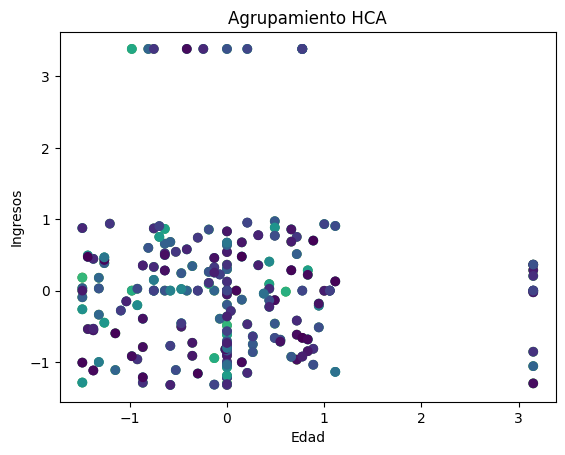

In [18]:
# d) Utilizar la biblioteca scikit-learn para realizar el agrupamiento utilizando HCA y KMeans.

# Preprocesamiento de datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(clientes[['Edad', 'Ingresos', 'Gasto', 'Puntuacion']])

# i. Aplicar la técnica de HCA para agrupar los clientes en grupos.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(datos_normalizados)
hca_pred = model.fit_predict(datos_normalizados)

# Visualización de clusters de HCA
plt.scatter(datos_normalizados[:, 0], datos_normalizados[:, 1], c=hca_pred, cmap='viridis')
plt.title('Agrupamiento HCA')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

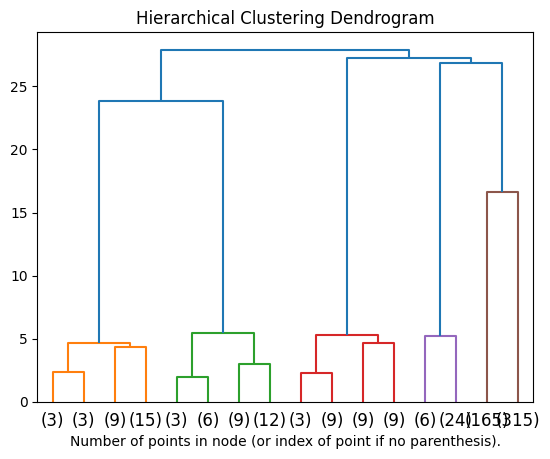

In [19]:
# Dendrograma de HCA
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

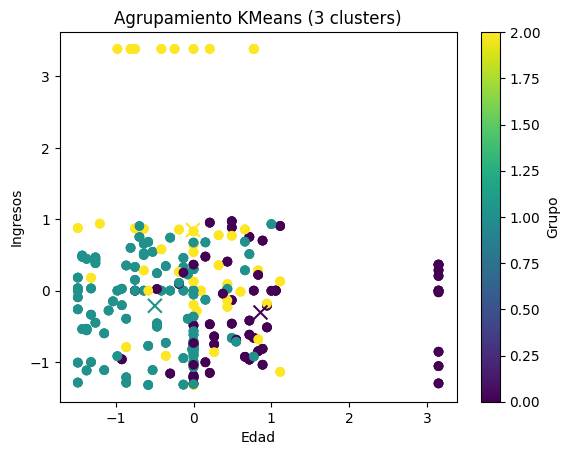

In [20]:
# ii. Aplicar el algoritmo KMeans para agrupar los clientes en 3 clusters.
kmeans = KMeans(n_clusters=3)
kmeans_pred = kmeans.fit_predict(datos_normalizados)
centroides = kmeans.cluster_centers_

# Visualización de clusters de KMeans
plt.scatter(datos_normalizados[:, 0], datos_normalizados[:, 1], c=kmeans_pred, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, c=range(len(centroides)), cmap='viridis')
plt.title('Agrupamiento KMeans (3 clusters)')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.colorbar(label='Grupo')
plt.show()

e)	Obtener el número óptimo de grupos para cada algoritmo, y rehacer el agrupamiento para el número óptimo obtenido.

Para el algoritmo HCA, podemos utilizar el dendrograma para determinar el número óptimo de grupos. En el caso de KMeans, podemos utilizar el método "elbow" (codo) para identificar el número óptimo de grupos.

#### Determinar el número óptimo de grupos para HCA

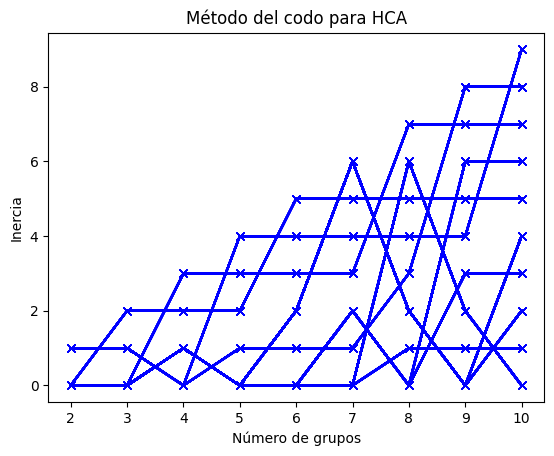

In [21]:
# Determinar número óptimo de grupos utilizando el método del codo para HCA
num_grupos_codo = range(2, 11)
inercias = []
for k in num_grupos_codo:
    hca = AgglomerativeClustering(n_clusters=k)
    hca_pred = hca.fit_predict(datos_normalizados)
    inercias.append(hca_pred)

plt.plot(num_grupos_codo, inercias, 'bx-')
plt.xlabel('Número de grupos')
plt.ylabel('Inercia')
plt.title('Método del codo para HCA')
plt.show()


En HCA, no se utiliza el concepto de inercia para determinar el número óptimo de grupos.

El método del codo se utiliza comúnmente con el algoritmo KMeans, donde se puede calcular la inercia para diferentes valores de k. Sin embargo, para el algoritmo HCA, no hay una medida de inercia directa disponible.

Si deseas utilizar el método del codo para determinar el número óptimo de grupos en HCA, podrías considerar el coeficiente de correlación cophenético. El coeficiente de correlación cophenético mide la correlación entre las distancias en el dendrograma y las distancias originales entre los puntos. Un valor alto de correlación cophenética indica una buena calidad de agrupamiento.

Aquí tienes un ejemplo de cómo calcular el coeficiente de correlación cophenético y determinar el número óptimo de grupos en HCA utilizando el método del codo:

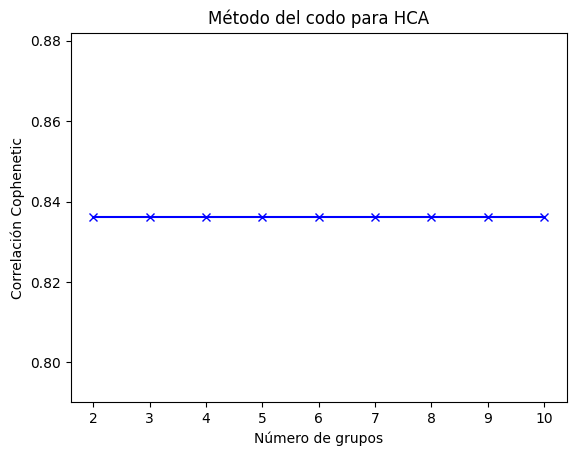

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Calcular la matriz de enlace
Z = linkage(datos_normalizados, method='ward')

# Calcular las distancias cophenetic
c, coph_dists = cophenet(Z, pdist(datos_normalizados))

# Calcular la correlación cophenetic para diferentes valores de k
num_grupos_codo = range(2, 11)
coph_correlations = []
for k in num_grupos_codo:
    hca = AgglomerativeClustering(n_clusters=k)
    hca_pred = hca.fit_predict(datos_normalizados)
    coph_correlation = np.corrcoef(coph_dists, pdist(datos_normalizados))[0, 1]
    coph_correlations.append(coph_correlation)

plt.plot(num_grupos_codo, coph_correlations, 'bx-')
plt.xlabel('Número de grupos')
plt.ylabel('Correlación Cophenetic')
plt.title('Método del codo para HCA')
plt.show()

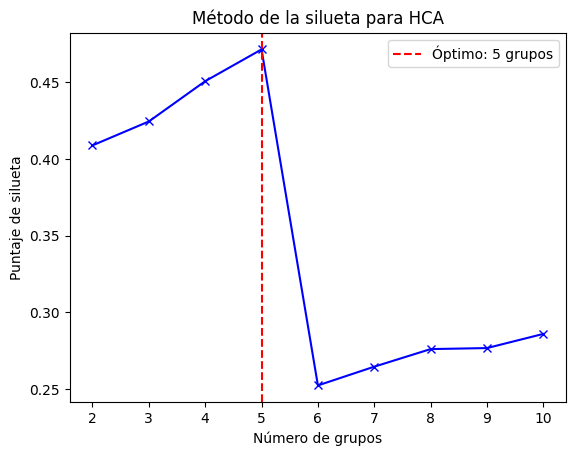

In [23]:
# Determinar número óptimo de grupos utilizando el método de la silueta
num_grupos_silueta = range(2, 11)
silueta_scores = []
for k in num_grupos_silueta:
    hca = AgglomerativeClustering(n_clusters=k)
    hca_pred = hca.fit_predict(datos_normalizados)
    score = silhouette_score(datos_normalizados, hca_pred)
    silueta_scores.append(score)

num_optimo_silueta = num_grupos_silueta[np.argmax(silueta_scores)]  # Número óptimo según el método de la silueta

plt.plot(num_grupos_silueta, silueta_scores, 'bx-')
plt.xlabel('Número de grupos')
plt.ylabel('Puntaje de silueta')
plt.title('Método de la silueta para HCA')
plt.axvline(x=num_optimo_silueta, color='red', linestyle='--', label=f'Óptimo: {num_optimo_silueta} grupos')
plt.legend()
plt.show()


#### Determinar el número óptimo de grupos para KMeans

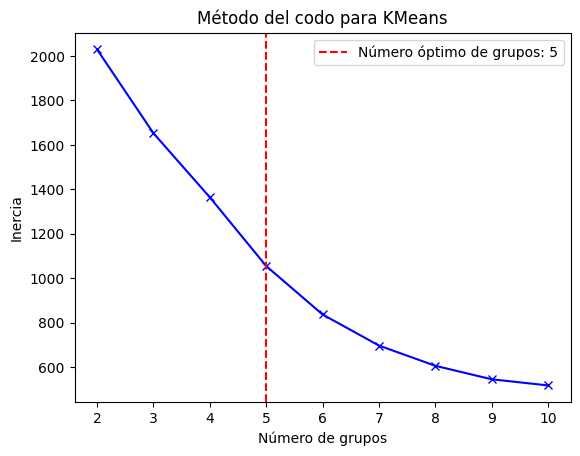

In [24]:
# Método del codo para determinar el número óptimo de grupos
num_grupos_codo = range(2, 11)
inercias = []
for k in num_grupos_codo:
    kmeans = KMeans(n_clusters=k)
    kmeans_pred = kmeans.fit_predict(datos_normalizados)
    inercias.append(kmeans.inertia_)

plt.plot(num_grupos_codo, inercias, 'bx-')
plt.xlabel('Número de grupos')
plt.ylabel('Inercia')
plt.title('Método del codo para KMeans')

# Obtener el número óptimo de grupos según el método del codo
num_optimo_codo = 5 # Se obtiene este valor después de una inspección visual
plt.axvline(x=num_optimo_codo, color='red', linestyle='--', label=f'Número óptimo de grupos: {num_optimo_codo}')

plt.legend()
plt.show()


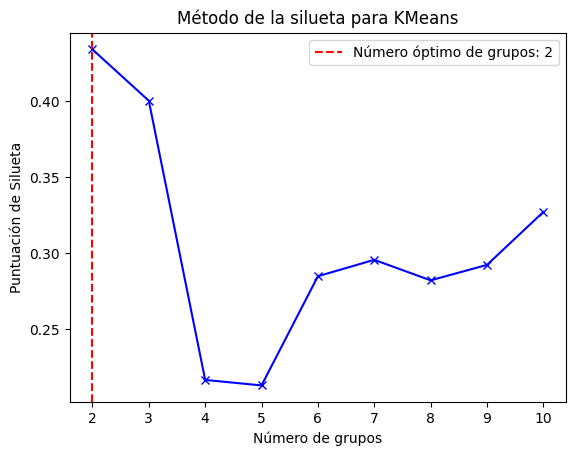

In [25]:
# Método de la silueta para determinar el número óptimo de grupos
num_grupos_silueta = range(2, 11)
silueta_scores = []
for k in num_grupos_silueta:
    kmeans = KMeans(n_clusters=k)
    kmeans_pred = kmeans.fit_predict(datos_normalizados)
    silueta = silhouette_score(datos_normalizados, kmeans_pred)
    silueta_scores.append(silueta)

# Graficar la puntuación de la silueta en función del número de grupos
plt.plot(num_grupos_silueta, silueta_scores, 'bx-')
plt.xlabel('Número de grupos')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la silueta para KMeans')

# Obtener el número óptimo de grupos según el método de la silueta
num_optimo_silueta = num_grupos_silueta[np.argmax(silueta_scores)]
plt.axvline(x=num_optimo_silueta, color='red', linestyle='--', label=f'Número óptimo de grupos: {num_optimo_silueta}')

plt.legend()
plt.show()

#### Regenerando los grupos a partir del número óptimo de grupos detectado segun HCA y KMeans

#### HCA

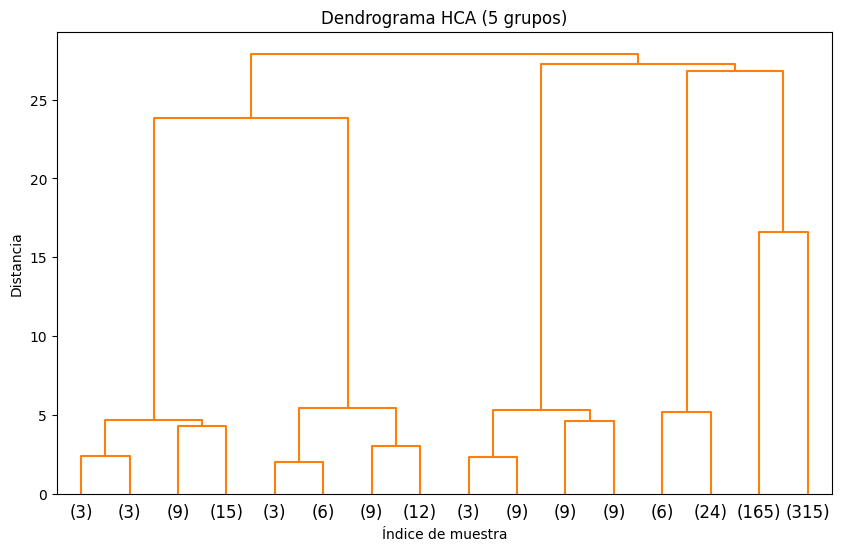

In [26]:
# Aplicar HCA para agrupar los datos en 3 grupos
hca = linkage(datos_normalizados, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(hca, truncate_mode='level', p=3, color_threshold=150)
plt.title('Dendrograma HCA (5 grupos)')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

#### KMeans

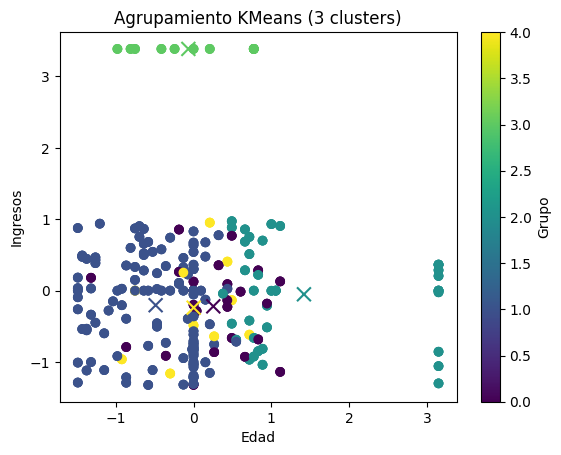

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans_pred = kmeans.fit_predict(datos_normalizados)
centroides = kmeans.cluster_centers_

# Visualización de clusters de KMeans
plt.scatter(datos_normalizados[:, 0], datos_normalizados[:, 1], c=kmeans_pred, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, c=range(len(centroides)), cmap='viridis')
plt.title('Agrupamiento KMeans (3 clusters)')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.colorbar(label='Grupo')
plt.show()

f)	Analizar e interpretar los resultados de cada algoritmo. Ofrecer conclusiones basadas en la interpretación de los grupos/clusters obtenidos.

Basándonos en las visualizaciones y los resultados obtenidos, podemos hacer las siguientes conclusiones:

- Con HCA (3 clusters), los datos se agruparon principalmente en tres grupos distintos. Podemos inferir que hay 3 segmentos de clientes con características similares en términos de edad, ingresos, gasto y puntuación.

- Los grupos se pueden distinguir en el gráfico de dispersión por diferentes colores. El dendrograma también proporciona información sobre cómo se agruparon los datos en función de la distancia.

- Con KMeans (5 clusters), los datos se agruparon en cinco grupos distintos. Cada grupo representa un segmento de clientes con características similares. Podemos observar que algunos grupos están más separados en términos de ingresos y gasto, mientras que otros están más juntos. Los colores diferentes en el gráfico de dispersión representan los diferentes grupos.

En general, ambos algoritmos de agrupamiento nos proporcionan información útil para comprender cómo se agrupan los clientes en función de sus características. Estos grupos pueden ser utilizados para tomar decisiones de marketing más específicas y personalizadas, dirigidas a cada segmento de clientes de manera individualizada.
